In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib import rcParams

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\SMART_HEALTH\Datasets\heart_disease\heart.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


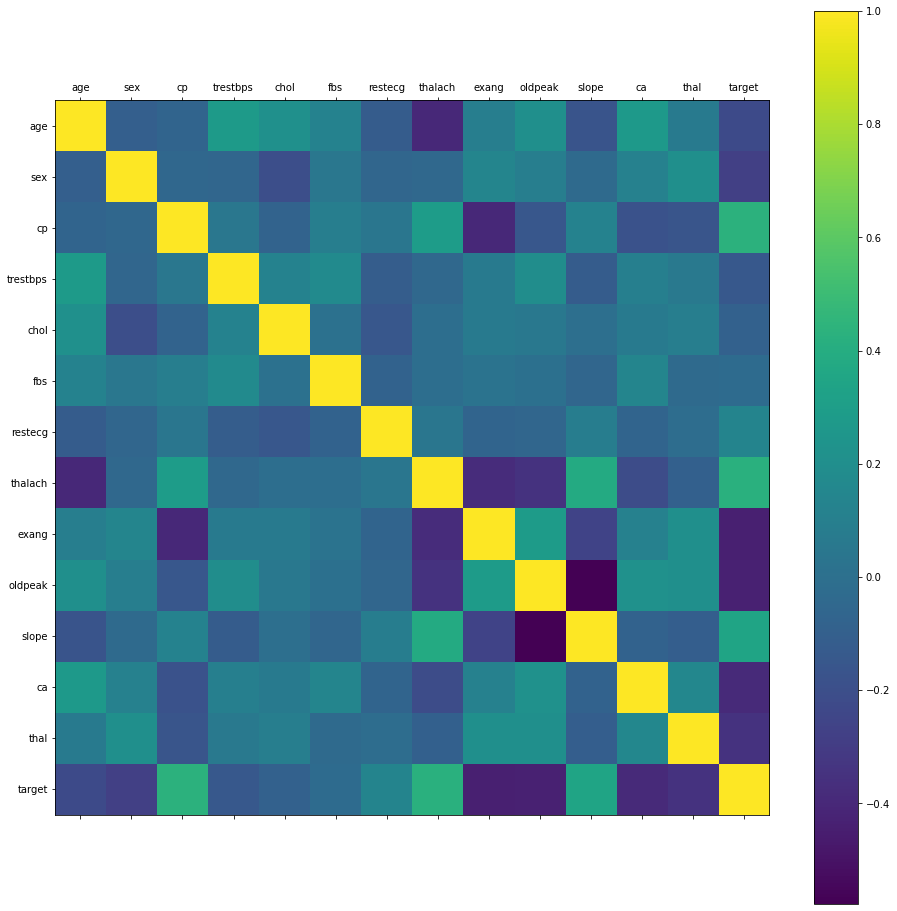

In [7]:
rcParams['figure.figsize'] = 30,16
plt.matshow(dataset.corr())
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

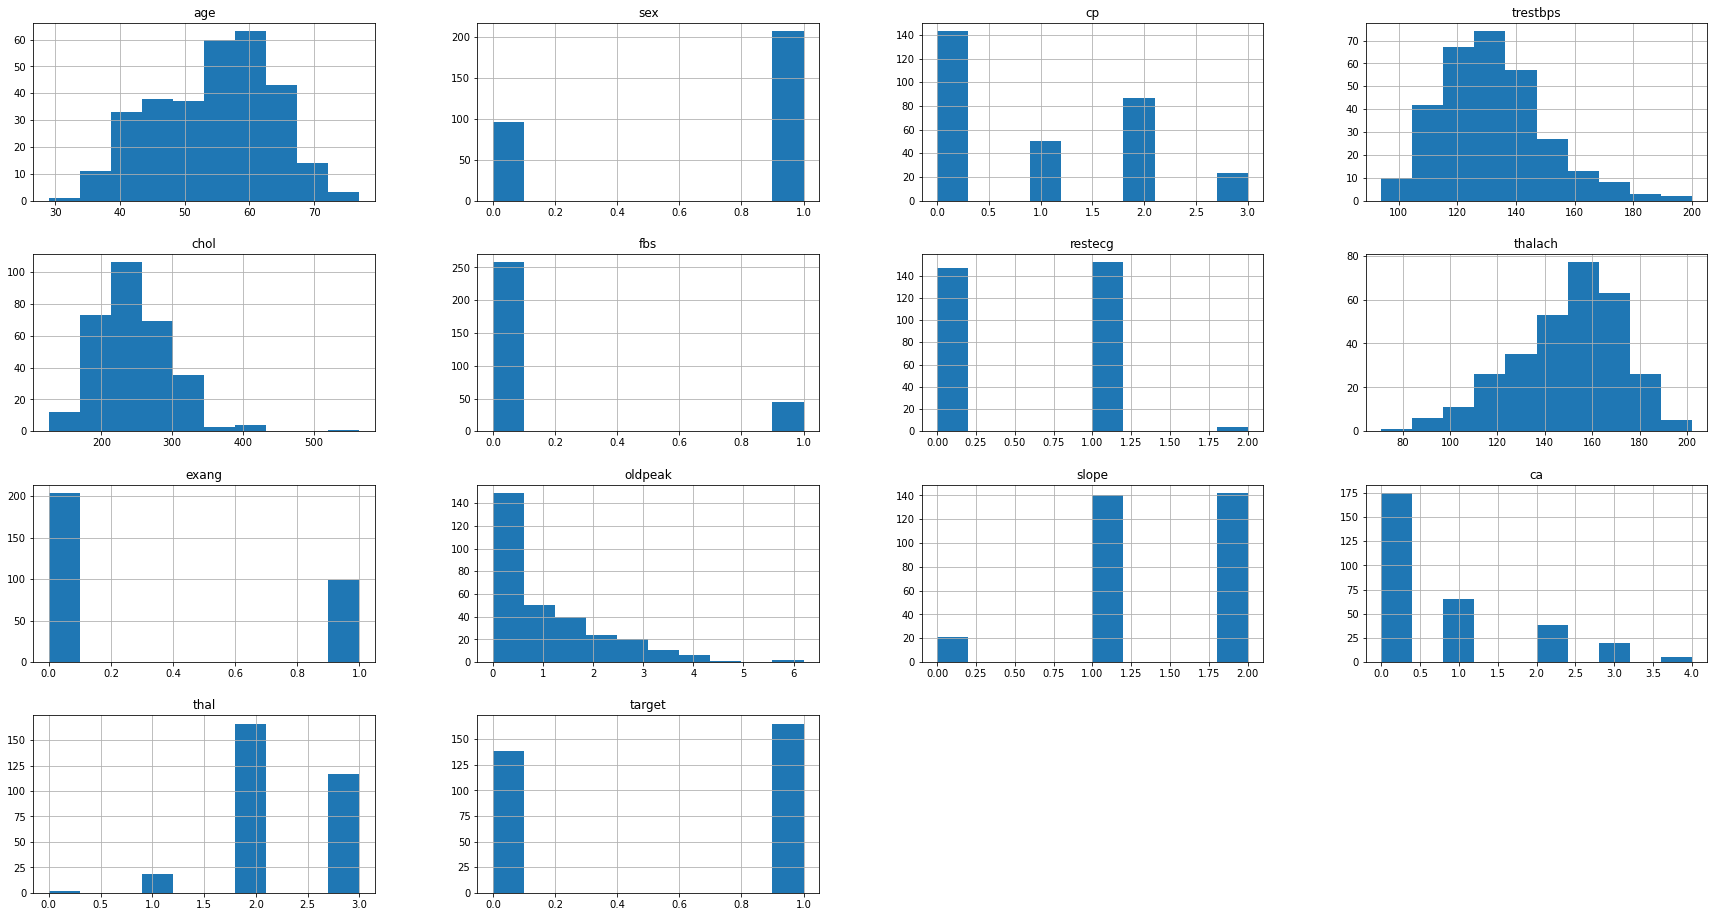

In [8]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target class')

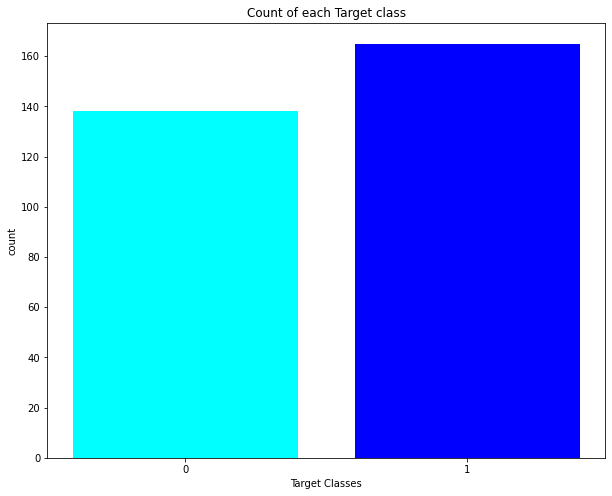

In [9]:
rcParams['figure.figsize'] = 10,8
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['blue', 'cyan'])
plt.xticks([0, 1])
plt.xlabel("Target Classes")
plt.ylabel("count")
plt.title('Count of each Target class')

In [10]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
dataset.head(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
StdSclr = StandardScaler()
columns = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns] = StdSclr.fit_transform(dataset[columns])

In [13]:
y = dataset['target']
x = dataset.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.78, random_state = 0)

In [14]:
# Logistic Regression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)


LogisticRegression()

In [15]:
print('Accuracy = {}'.format(round(100*LR_model.score(x_test, y_test), 2)))

Accuracy = 85.07


In [16]:
# K neighbors classifier

knn_score_lst = []
for i in range(1, 10):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_score_lst.append(round(100*knn_model.score(x_test, y_test),2))

([<matplotlib.axis.XTick at 0x17af33935e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

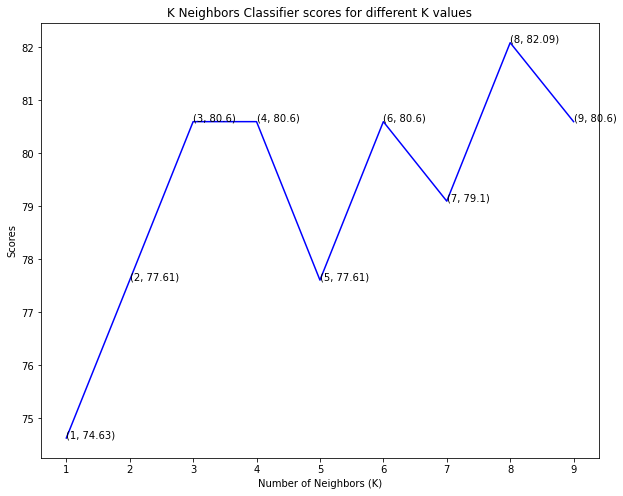

In [17]:
plt.plot([ i for i in range(1, 10)], knn_score_lst, color = 'blue')
for i in range(1, 10):
    plt.text( i, knn_score_lst[i-1], (i, knn_score_lst[i-1]))
plt.title('K Neighbors Classifier scores for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.xticks([i for i in range( 1, 10)])

In [18]:
# decision tree classifier
decision_tree_score_lst = []
for i in range(1, len(x.columns) + 1):
    dt_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_model.fit(x_train, y_train)
    decision_tree_score_lst.append(round(100*dt_model.score(x_test, y_test), 2))

([<matplotlib.axis.XTick at 0x17af340e280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

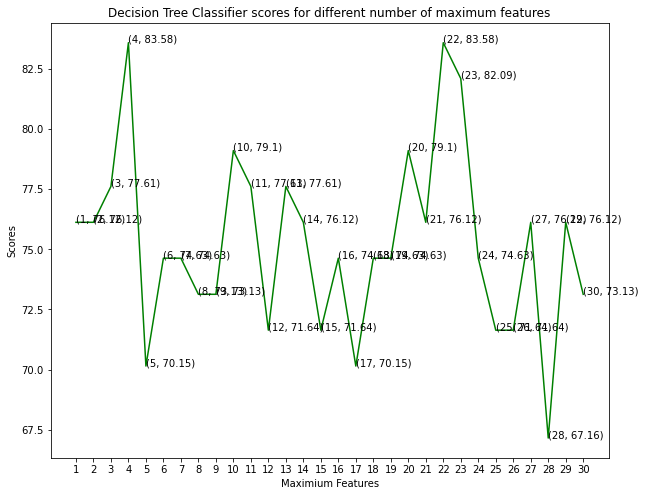

In [19]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decision_tree_score_lst, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text( i, decision_tree_score_lst[i-1], ( i, decision_tree_score_lst[i-1]))
plt.title("Decision Tree Classifier scores for different number of maximum features")
plt.xlabel("Maximium Features")
plt.ylabel("Scores")
plt.xticks([i for i in range(1, len(x.columns) + 1)])

In [20]:
#svm
svc_score_lst = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_model = SVC(kernel = i)
    svc_model.fit(x_train, y_train)
    svc_score_lst.append(svc_model.score(x_test, y_test))

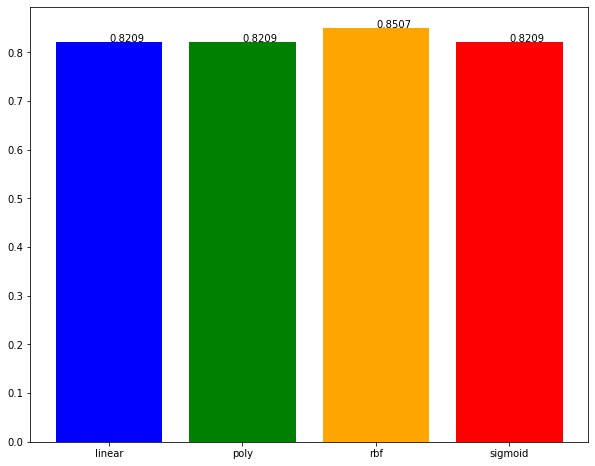

In [21]:
plt.bar(kernels, svc_score_lst, color = ['blue', 'green', 'orange', 'red'])
for i in range(len(kernels)):
    plt.text(i, svc_score_lst[i], round(svc_score_lst[i], 4))

In [22]:
#Naive bayes

Nb_model = GaussianNB()

Nb_model.fit(x_train, y_train)

Nb_model.score(x_test, y_test)


0.835820895522388

# Accuracy Comparision

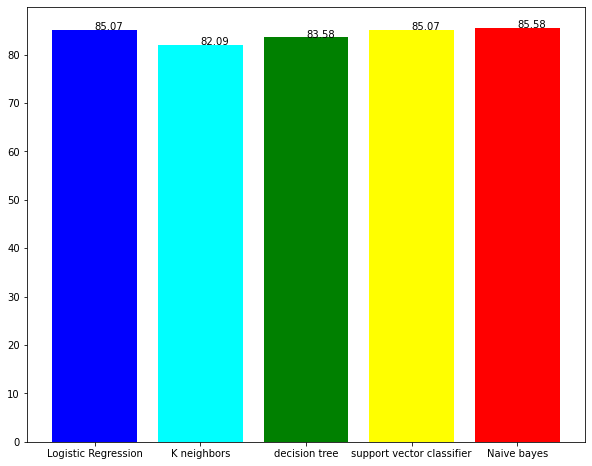

In [36]:
rcParams['figure.figsize'] = 10,8
lst_x = ['Logistic Regression', 'K neighbors', 'decision tree', 'support vector classifier', 'Naive bayes']
lst_y = [ 85.07, 82.09, 83.58, 85.07, 85.58 ]
plt.bar( lst_x, lst_y, color = ['blue', 'cyan', 'green', 'yellow', 'red'])
for i in range(len(lst_y)):
    plt.text(i, lst_y[i], lst_y[i])

# Heart Disease

Clearly Logistic regression and SVC showed best result